<a href="https://colab.research.google.com/github/ale-chen/Arbitrage/blob/main/CategoricalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.11.0


In [ ]:
import pandas as pd

X = pd.read_csv('drive/MyDrive/prem_data/train_data/X.csv', header = None)
y = pd.read_csv('drive/MyDrive/prem_data/train_data/y.csv', header = None)

In [ ]:
col_names = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']
print(col_names)
extended_col_names = col_names.copy()
for i in range(5):
  extended_col_names.extend([name + "_H_" + str(i) for name in col_names])
for i in range(5):
  extended_col_names.extend([name + "_A_" + str(i) for name in col_names])

extended_col_names = [ele for ele in extended_col_names if ele not in ['MAXH','MAXD','MAXA']]

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']


In [ ]:
X.columns = extended_col_names

#WE DON'T WANT TO TRAIN ON GAME STATS, ONLY PREVIOUS

#X.drop(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG','HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR'], axis = 1)


X = X.drop(X.iloc[:, 21:261],axis = 1)

X

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,733305,5,4,2.0,0.0,-1,0.0,0.0,0,17.0,...,11.0,11.0,9.0,16.0,8.0,7.0,2.0,3.0,0.0,0.0
1,733305,6,11,3.0,1.0,-1,2.0,0.0,-1,12.0,...,6.0,8.0,8.0,21.0,2.0,6.0,1.0,2.0,0.0,0.0
2,733305,1,0,1.0,3.0,1,1.0,2.0,1,12.0,...,8.0,9.0,12.0,10.0,7.0,17.0,2.0,2.0,0.0,0.0
3,733305,10,12,0.0,0.0,0,0.0,0.0,0,27.0,...,11.0,2.0,8.0,10.0,20.0,3.0,1.0,1.0,0.0,0.0
4,733306,3,2,2.0,2.0,0,1.0,0.0,-1,9.0,...,5.0,8.0,11.0,12.0,4.0,6.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,738555,9,29,2.0,1.0,-1,1.0,0.0,-1,14.0,...,5.0,3.0,9.0,9.0,5.0,5.0,1.0,2.0,1.0,0.0
5405,738555,20,10,3.0,0.0,-1,2.0,0.0,-1,12.0,...,6.0,4.0,9.0,7.0,2.0,7.0,1.0,1.0,0.0,0.0
5406,738556,13,17,1.0,0.0,-1,1.0,0.0,-1,12.0,...,3.0,5.0,19.0,14.0,4.0,6.0,2.0,3.0,1.0,0.0
5407,738556,39,37,1.0,0.0,-1,1.0,0.0,-1,6.0,...,2.0,4.0,15.0,14.0,0.0,2.0,4.0,2.0,0.0,0.0


In [ ]:
n_classes = 4

#Y is read in horizontally, so transpose
y = y.transpose()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y).toarray()

X_tr, X_te, y_tr, y_te = train_test_split(X, y_ohe, test_size = .2)

#trying unscaled data, remove later
"""
X_tr_scaled = X_tr
X_te_scaled = X_te
"""

scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

"""
scaler = MinMaxScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)
"""

'\nscaler = MinMaxScaler()\n\nX_tr_scaled = scaler.fit_transform(X_tr)\nX_te_scaled = scaler.transform(X_te)\n'

In [ ]:
print(X_tr_scaled.shape)
print(X_te_scaled.shape)

(4327, 21)
(1082, 21)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

"""
BUILDING NEURAL NETWORK:

Sizing loosely based on:
http://www.faqs.org/faqs/ai-faq/neural-nets/part1/preamble.html

Jeff Heaton: "The optimal size of the hidden layer is usually between the size
of the input and size of the output layers"

For the future: iterate through different sizing, pruning parameters etc
"""
# Three Hidden Layers of 261, 256, 128, 64, 4 dimension

model = Sequential()
model.add(Dense(261, input_dim = 261, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

"""
model = Sequential()
model.add(Dense(32, input_dim = 21, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
"""

In [ ]:
%pip install tensorflow-addons
import tensorflow_addons as tfa
"""
DEFINE LOSS AND OPTIMIZER:

Adam is an extended version of stochastic gradient descent.
https://optimization.cbe.cornell.edu/index.php?title=Adam

After doing some research, the most common loss function seems to be categorical
crossentropy, but I believe for these data, a sigmoid FOCAL cross-entropy loss
might prove more effective. This is due to the outsized imbalanced "hit-rate."

https://arxiv.org/pdf/1708.02002.pdf

A gamma of 2 is extraordinarily high, but data is extraordinarily imbalanced
"""

model.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(gamma = 2), optimizer = 'adam',
              metrics = ['accuracy']
              )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
history = model.fit(X_tr_scaled, y_tr,validation_data = (X_te_scaled,y_te), epochs=30, batch_size=50)

Epoch 1/30
87/87 [==============================] - 3s 13ms/step - loss: 0.2780 - accuracy: 0.1581 - val_loss: 0.2253 - val_accuracy: 0.5083
Epoch 2/30
87/87 [==============================] - 0s 6ms/step - loss: 0.2130 - accuracy: 0.5625 - val_loss: 0.1970 - val_accuracy: 0.5730
Epoch 3/30
87/87 [==============================] - 1s 8ms/step - loss: 0.1888 - accuracy: 0.5750 - val_loss: 0.1817 - val_accuracy: 0.5749
Epoch 4/30
87/87 [==============================] - 1s 7ms/step - loss: 0.1792 - accuracy: 0.5755 - val_loss: 0.1768 - val_accuracy: 0.5739
Epoch 5/30
87/87 [==============================] - 1s 7ms/step - loss: 0.1752 - accuracy: 0.5755 - val_loss: 0.1742 - val_accuracy: 0.5739
Epoch 6/30
87/87 [==============================] - 1s 6ms/step - loss: 0.1731 - accuracy: 0.5752 - val_loss: 0.1729 - val_accuracy: 0.5758
Epoch 7/30
87/87 [==============================] - 1s 8ms/step - loss: 0.1716 - accuracy: 0.5755 - val_loss: 0.1720 - val_accuracy: 0.5758
Epoch 8/30
87/87 [=

In [ ]:
import numpy as np

y_pred = model.predict(X_te_scaled)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_te)):
    test.append(np.argmax(y_te[i]))

34/34 [==============================] - 1s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

a = accuracy_score(pred, test)
b = balanced_accuracy_score(pred, test)

print('Accuracy is:', a * 100)
print('Balanced Accuracy is', b * 100)

Accuracy is: 68.8539741219963
Balanced Accuracy is 67.98578349525806


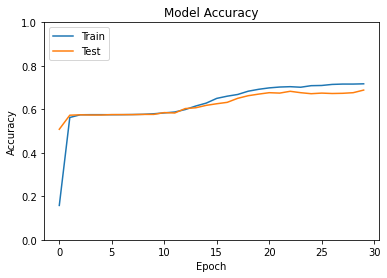

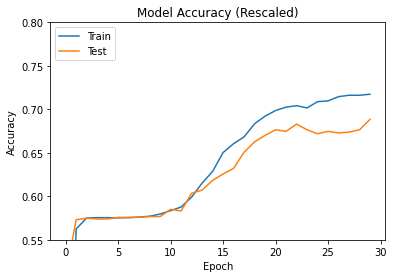

"\nplt.plot(epochs, quad_fit(epochs))\nplt.plot(epochs, quad_fit_val(epochs))\n\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Test'], loc='upper left')\nplt.ylim((.6,1))\nplt.show()\n"

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,31)
quad_fit = np.poly1d(np.polyfit(epochs, history.history['accuracy'], 3))
quad_fit_val = np.poly1d(np.polyfit(epochs, history.history['val_accuracy'], 3))

#plt.plot(epochs, quad_fit(epochs))
#plt.plot(epochs, quad_fit_val(epochs))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,1))
plt.savefig("CategoricalModelPerformance.eps", dpi=1200)
plt.show()

#plt.plot(epochs, quad_fit(epochs))
#plt.plot(epochs, quad_fit_val(epochs))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Rescaled)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((.55,.8))
plt.savefig("CategoricalPerformanceScaled.eps", dpi=1200)
plt.show()
"""
plt.plot(epochs, quad_fit(epochs))
plt.plot(epochs, quad_fit_val(epochs))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((.6,1))
plt.show()
"""

In [ ]:
def getMaxfromRoots(model, root1, root2):
  maxX = (root2 + abs(root2 - root1))
  return maxX, model(maxX)
print(getMaxfromRoots(quad_fit, quad_fit.roots[0], quad_fit.roots[1]))
print(quad_fit_val.roots)

#validation maximum X value is 56.2 epochs

print("Max validation accuracy achieved is: " + str(100 * quad_fit_val(56.2)) + "%")

((83.30980668559762-25.258090411805092j), (5.169962256097762-9.190697939158248j))
[54.28495454 +0.j         -5.74334285+26.18669318j
 -5.74334285-26.18669318j]
Max validation accuracy achieved is: -12.314767599725684%


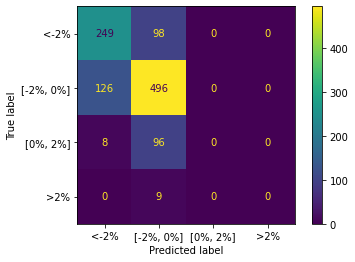

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(test, pred), display_labels = ["<-2%", "[-2%, 0%]","[0%, 2%]",">2%"])

disp.plot()
plt.show()